In [2]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML

In [3]:
IMAGE_SIZE = 256
CHANNELS = 3
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True
)
train_generator = train_datagen.flow_from_directory(
        r'C:\Users\ADMIN\Documents\Project updated\aptos-augmented-images\train\retina',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse",
#         save_to_dir="C:\\Code\\potato-disease-classification\\training\\AugmentedImages"
)

Found 10000 images belonging to 5 classes.


In [4]:
train_generator.class_indices

{'0': 0, '1': 1, '2': 2, '3': 3, '4': 4}

In [5]:
class_names = list(train_generator.class_indices.keys())
class_names

['0', '1', '2', '3', '4']

In [6]:
count=0
for image_batch, label_batch in train_generator:
#     print(label_batch)
    print(image_batch[0])
    break
#     count+=1
#     if count>2:
#         break

[[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 ...

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]]


In [7]:
validation_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)
validation_generator = validation_datagen.flow_from_directory(
        r'C:\Users\ADMIN\Documents\Project updated\aptos-augmented-images\valid\retina',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 10000 images belonging to 5 classes.


In [8]:
test_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)

test_generator = test_datagen.flow_from_directory(
        r'C:\Users\ADMIN\Documents\Project updated\aptos-augmented-images\test',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 9433 images belonging to 5 classes.


In [9]:
for image_batch, label_batch in test_generator:
    print(image_batch[0])
    break

[[[0.19332372 0.         0.        ]
  [0.16202976 0.         0.        ]
  [0.13073577 0.         0.        ]
  ...
  [0.32633194 0.11933049 0.0282927 ]
  [0.32522237 0.11711141 0.02718316]
  [0.32411286 0.11489234 0.02607362]]

 [[0.1955428  0.         0.        ]
  [0.16424881 0.         0.        ]
  [0.13295485 0.         0.        ]
  ...
  [0.3137255  0.08803651 0.01264571]
  [0.3137255  0.08581745 0.01153617]
  [0.3137255  0.08359837 0.01042663]]

 [[0.19776186 0.         0.        ]
  [0.16646789 0.         0.        ]
  [0.13517393 0.         0.        ]
  ...
  [0.31072423 0.05974383 0.        ]
  [0.3096147  0.05863428 0.        ]
  [0.30850515 0.05752475 0.        ]]

 ...

 [[0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  ...
  [0.6691872  0.91580653 0.9707376 ]
  [0.652259   0.93509537 1.        ]
  [0.21451905 0.1847914  0.19634086]]

 [[0.         0.         0.        ]
  [0.         0.         0.        ]


In [13]:

input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 5

model = models.Sequential([
    layers.InputLayer(input_shape=input_shape),
    layers.Conv2D(32, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

In [14]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 60, 60, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 28, 28, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 12, 12, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 2, 2, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 5)              │           325 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 183,877 (718.27 KB)

 Trainable params: 183,877 (718.27 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [17]:
history = model.fit(
    train_generator,
    steps_per_epoch=47,
    batch_size=32,
    validation_data=validation_generator,
    validation_steps=6,
    verbose=1,
    epochs=100,
)

Epoch 1/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 142s 3s/step - accuracy: 0.2195 - loss: 1.6064 - val_accuracy: 0.3021 - val_loss: 1.4981
Epoch 2/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 131s 3s/step - accuracy: 0.3755 - loss: 1.4378 - val_accuracy: 0.3750 - val_loss: 1.3822
Epoch 3/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 132s 3s/step - accuracy: 0.4195 - loss: 1.3462 - val_accuracy: 0.3906 - val_loss: 1.3748
Epoch 4/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 130s 3s/step - accuracy: 0.4339 - loss: 1.3138 - val_accuracy: 0.4167 - val_loss: 1.3063
Epoch 5/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 130s 3s/step - accuracy: 0.4203 - loss: 1.3037 - val_accuracy: 0.4427 - val_loss: 1.2973
Epoch 6/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 131s 3s/step - accuracy: 0.4248 - loss: 1.2604 - val_accuracy: 0.4219 - val_loss: 1.2957
Epoch 7/100
31/47 ━━━━━━━━━━━━━━━━━━━━ 41s 3s/step - accuracy: 0.4540 - loss: 1.2678

c:\Users\ADMIN\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\trainers\epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


47/47 ━━━━━━━━━━━━━━━━━━━━ 87s 2s/step - accuracy: 0.4542 - loss: 1.2656 - val_accuracy: 0.4635 - val_loss: 1.2575
Epoch 8/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 129s 3s/step - accuracy: 0.4650 - loss: 1.2246 - val_accuracy: 0.4323 - val_loss: 1.2786
Epoch 9/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 130s 3s/step - accuracy: 0.5049 - loss: 1.1444 - val_accuracy: 0.5521 - val_loss: 1.1715
Epoch 10/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 131s 3s/step - accuracy: 0.4587 - loss: 1.2148 - val_accuracy: 0.5469 - val_loss: 1.1765
Epoch 11/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 130s 3s/step - accuracy: 0.4657 - loss: 1.1836 - val_accuracy: 0.5365 - val_loss: 1.1614
Epoch 12/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 130s 3s/step - accuracy: 0.5367 - loss: 1.0851 - val_accuracy: 0.5312 - val_loss: 1.1249
Epoch 13/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 130s 3s/step - accuracy: 0.4961 - loss: 1.1325 - val_accuracy: 0.5729 - val_loss: 1.0986
Epoch 14/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 91s 2s/step - accuracy: 0.5111 - loss: 1.1257 - val_accuracy: 0.5000 - va

In [18]:
scores = model.evaluate(test_generator)

295/295 ━━━━━━━━━━━━━━━━━━━━ 527s 2s/step - accuracy: 0.6588 - loss: 0.7911


In [19]:
scores

[0.7903834581375122, 0.6625675559043884]

In [20]:

history

In [21]:
history.params

{'verbose': 1, 'epochs': 100, 'steps': 47}

In [22]:

history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [23]:

type(history.history['loss'])

list

In [24]:
len(history.history['loss'])

100

In [25]:

history.history['loss'][:5] # show loss for first 5 epochs

[1.5805511474609375,
 1.4089220762252808,
 1.339231252670288,
 1.3062328100204468,
 1.3055167198181152]

In [26]:

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

In [27]:

val_acc

[0.3020833432674408,
 0.375,
 0.390625,
 0.4166666567325592,
 0.4427083432674408,
 0.421875,
 0.4635416567325592,
 0.4322916567325592,
 0.5520833134651184,
 0.546875,
 0.5364583134651184,
 0.53125,
 0.5729166865348816,
 0.5,
 0.5572916865348816,
 0.5260416865348816,
 0.5729166865348816,
 0.484375,
 0.46875,
 0.546875,
 0.5520833134651184,
 0.5052083134651184,
 0.5052083134651184,
 0.5625,
 0.53125,
 0.6354166865348816,
 0.5729166865348816,
 0.609375,
 0.6197916865348816,
 0.5625,
 0.5052083134651184,
 0.609375,
 0.59375,
 0.578125,
 0.6510416865348816,
 0.625,
 0.546875,
 0.5572916865348816,
 0.546875,
 0.609375,
 0.5885416865348816,
 0.5416666865348816,
 0.5364583134651184,
 0.5885416865348816,
 0.5625,
 0.6145833134651184,
 0.5260416865348816,
 0.5520833134651184,
 0.6302083134651184,
 0.6145833134651184,
 0.6197916865348816,
 0.5989583134651184,
 0.6354166865348816,
 0.6354166865348816,
 0.578125,
 0.6666666865348816,
 0.6302083134651184,
 0.5989583134651184,
 0.6197916865348816,
 0

In [28]:

acc

[0.24462366104125977,
 0.3776595890522003,
 0.42220744490623474,
 0.4268617033958435,
 0.42486703395843506,
 0.43617022037506104,
 0.4546371102333069,
 0.4509408473968506,
 0.49202126264572144,
 0.46343085169792175,
 0.46675533056259155,
 0.5172872543334961,
 0.4966755211353302,
 0.5090726017951965,
 0.5006720423698425,
 0.5578457713127136,
 0.5285904407501221,
 0.5246010422706604,
 0.5305851101875305,
 0.5578457713127136,
 0.5483871102333069,
 0.5339095592498779,
 0.5436828136444092,
 0.5625,
 0.5598404407501221,
 0.5591755509376526,
 0.5704787373542786,
 0.5403226017951965,
 0.5759408473968506,
 0.5791223645210266,
 0.5591755509376526,
 0.5964095592498779,
 0.572473406791687,
 0.5877659320831299,
 0.5705645084381104,
 0.5964095592498779,
 0.5698924660682678,
 0.5771276354789734,
 0.5890957713127136,
 0.6117021441459656,
 0.5997340679168701,
 0.5987903475761414,
 0.5771276354789734,
 0.6083776354789734,
 0.613696813583374,
 0.59375,
 0.595079779624939,
 0.6097074747085571,
 0.60860657

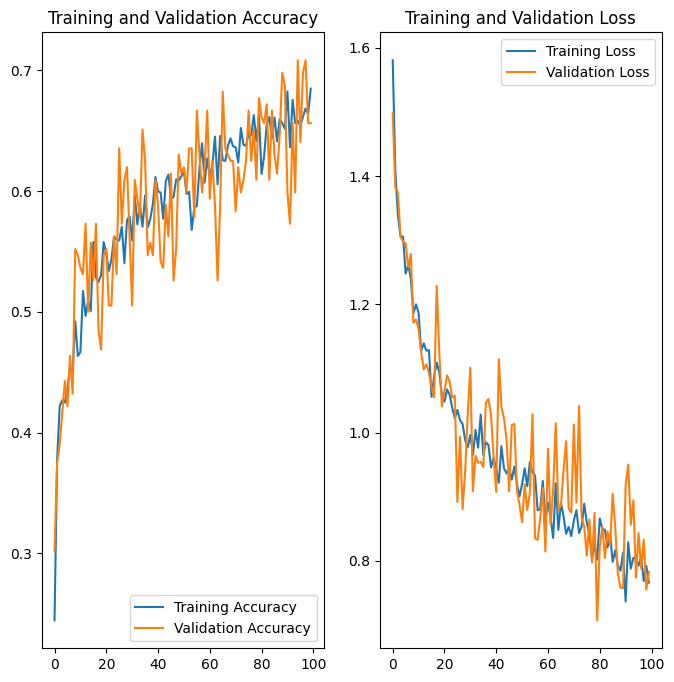

In [30]:
EPOCHS = 100

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [33]:

def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 476ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


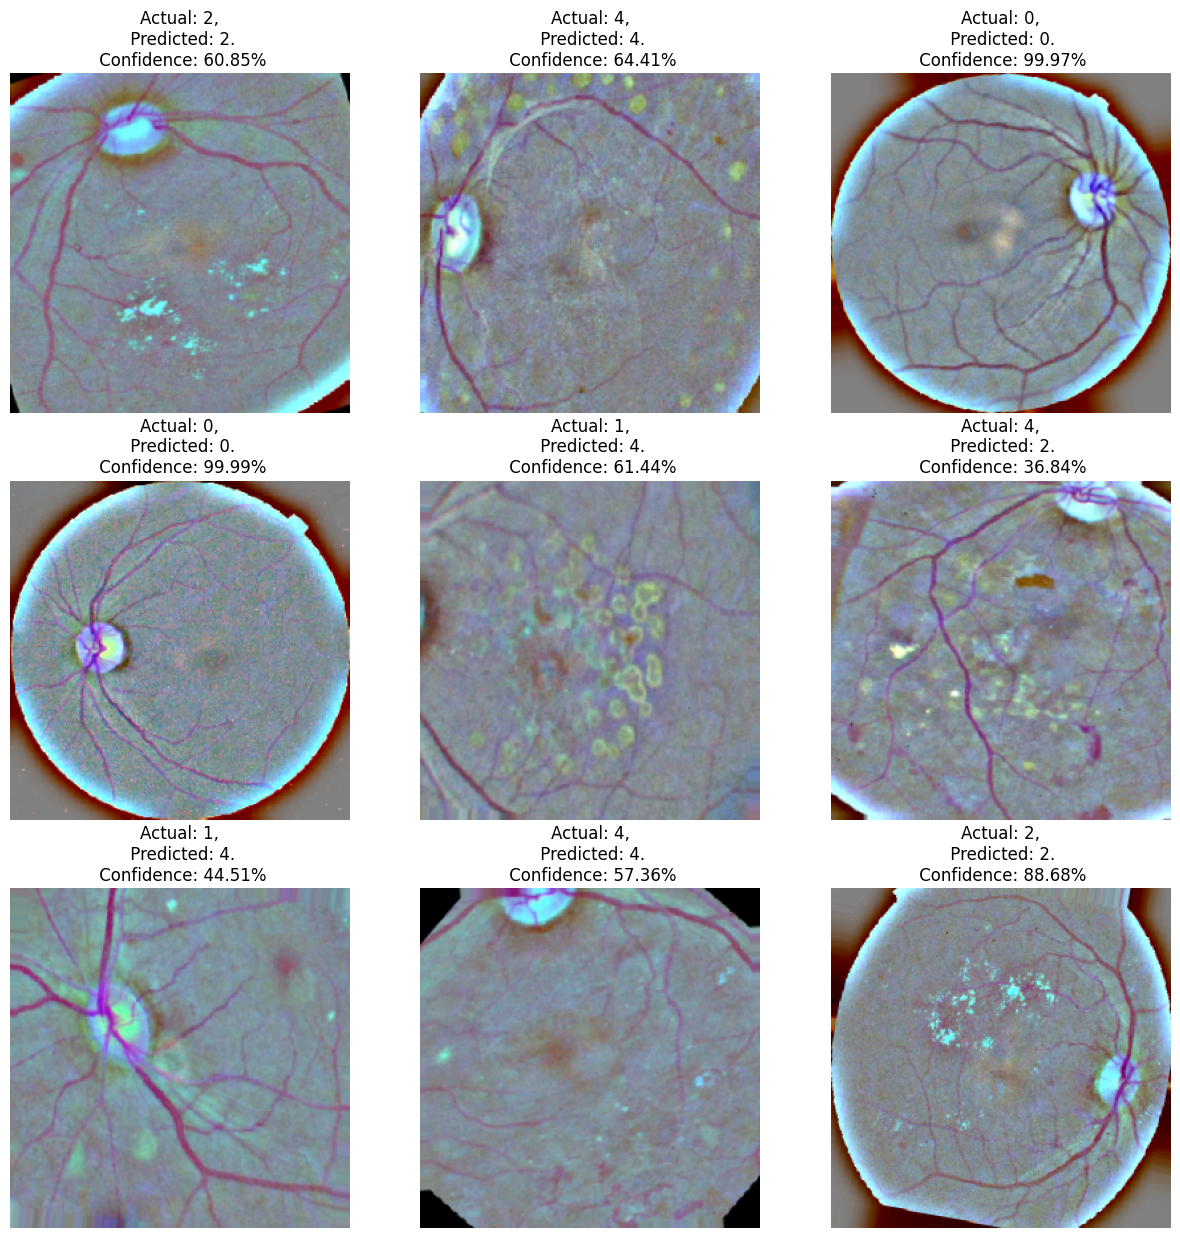

In [34]:

plt.figure(figsize=(15, 15))
for images, labels in test_generator:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
    break

In [35]:
model.save("models/dr_detection_train_dr2.h5")